In [2]:
import re
import matplotlib.pyplot as plt

Codigo para calculo del error 

In [3]:
# Función para calcular el factor de dominancia entre dos vectores
def dominance_factor(a, p):
    # Calcula DF(a, p) = max( max_i(a_i/p_i - 1), 0 )
    # Se asume que los costos son positivos
    ratios = [(a_i / p_i - 1) for a_i, p_i in zip(a, p)]
    return max(max(ratios), 0)

# Función para calcular el error de aproximación dado un conjunto aproximado A y el frente exacto P*
def approximation_error(approx_set, exact_set):
    # Para cada solución exacta p en P*, se calcula el mínimo DF(a, p) para a en A
    # El error es el máximo de estos valores.
    errors = []
    for p in exact_set:
        min_df = float('inf')
        for a in approx_set:
            df = dominance_factor(a, p)
            if df < min_df:
                min_df = df
        errors.append(min_df)
    return max(errors)

In [5]:
def parse_line(line):
    """
    Parsea una línea con formato:
    [62731,1373430],[62731,1373434],0.000996
    Devuelve: (cost_vector, time)
    Se ignora el primer vector (nodos solución) y se toma el segundo (costos).
    """
    vectors = re.findall(r'\[([^\]]+)\]', line)
    time_match = re.search(r',\s*([\d\.eE+-]+)\s*$', line)
    time_val = float(time_match.group(1)) if time_match else None

    if len(vectors) >= 2:
        cost_str = vectors[1]
        cost_values = [float(x) for x in cost_str.split(',')]
    else:
        cost_values = []
    
    return cost_values, time_val

def load_pareto_front(file_name):
    ##Carga la frontera de Pareto exacta desde un archivo
    exact_costs = []
    with open(file_name, 'r') as f:
        for line in f:
            line = line.strip()
            if not line:
                continue
            cost_vector, _ = parse_line(line)
            exact_costs.append(cost_vector)
    return exact_costs

def load_approx_solutions(file_name):
    ##Carga las soluciones aproximadas desde un archivo y las ordena por tiempo."""
    approx_points = []
    with open(file_name, 'r') as f:
        for line in f:
            line = line.strip()
            if not line:
                continue
            cost_vector, time_val = parse_line(line)
            approx_points.append((time_val, cost_vector))
    
    approx_points.sort(key=lambda x: x[0])
    return approx_points

In [ ]:
def compute_approximation_error(pareto_file, approx_file):
    """
    Calcula cómo disminuye el error de aproximación con el tiempo y lo grafica.
    """
    exact_costs = load_pareto_front(pareto_file)
    approx_points = load_approx_solutions(approx_file)

    cumulative_approxs = []
    error_time = []

    for t, cost_vec in approx_points:
        cumulative_approxs.append(cost_vec)
        err = approximation_error(cumulative_approxs, exact_costs)
        #print(err)
        #print(t)
        if err < 0.01:
            break 
        error_time.append((t, err))

    times = [t for t, err in error_time]
    
    errors = [err for t, err in error_time]
    return [times, errors]

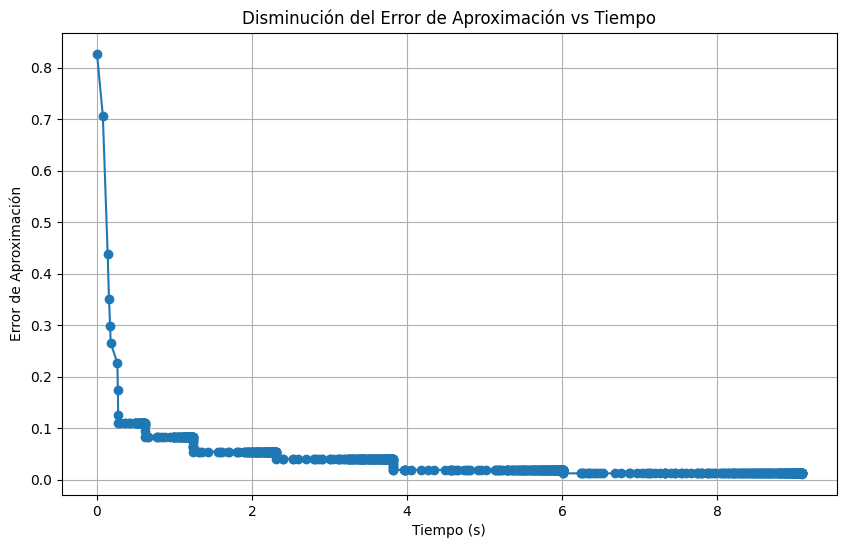

In [ ]:

    
AnytimeApexEnh1_5 = compute_approximation_error('BOASTART.txt', 'AnytimeApexEnh1.5.txt')
# Llamada a la función con los archivos de entrada
plt.figure(figsize=(10, 6))
plt.plot(AnytimeApexEnh1_5[0], AnytimeApexEnh1_5[1], marker='o', linestyle='-')
plt.xlabel('Tiempo (s)')
plt.ylabel('Error de Aproximación')
plt.title('Disminución del Error de Aproximación vs Tiempo')
plt.grid(True)
plt.show()

In [ ]:
AnytimeApexEnh1_5 = compute_approximation_error('BOASTART.txt', 'AnytimeApexEnh1.5.txt')

In [23]:
AnytimeApexHybrid1_5 = compute_approximation_error('BOASTART.txt', 'AnytimeApexHybrid1.5.txt')

In [11]:
AnytimeApexRestart1_5 = compute_approximation_error('BOASTART.txt', 'AnytimeApexRestart1.5.txt')	

In [17]:
LTMOA = compute_approximation_error('BOASTART.txt', 'LTMOAR.txt')

0.8268875974508805
0.000798
0.8268822768090516
0.001412
0.8260176725118351
0.001835
0.826012351870006
0.002171
0.825367224048237
0.002227
0.8253619034064079
0.002242
0.8194919053085374
0.002444
0.8194865846667083
0.002461
0.8186219803694921
0.002926
0.818616659727663
0.002951
0.818232243355516
0.007461
0.8182269227136869
0.007508
0.8173623184164707
0.009019
0.8173569977746415
0.009077
0.815327172916869
0.01155
0.8153218522750398
0.011624
0.8144572479778236
0.013685
0.8144519273359945
0.013733
0.8142045174909449
0.015588
0.814199196849116
0.015638
0.8140302664710444
0.02019
0.8140249458292155
0.020254
0.8131975860248022
0.027644
0.8131922653829731
0.027708
0.8129448555379235
0.029794
0.8129395348960946
0.029862
0.812770604518023
0.036226
0.8127652838761941
0.036301
0.8122265688910053
0.039342
0.8122212482491764
0.039435
0.8114497551839679
0.042193
0.8114444345421388
0.042286
0.8111345071555982
0.051814
0.8111291865137691
0.051898
0.8080245920065336
0.052403
0.8080192713647047
0.052492
0

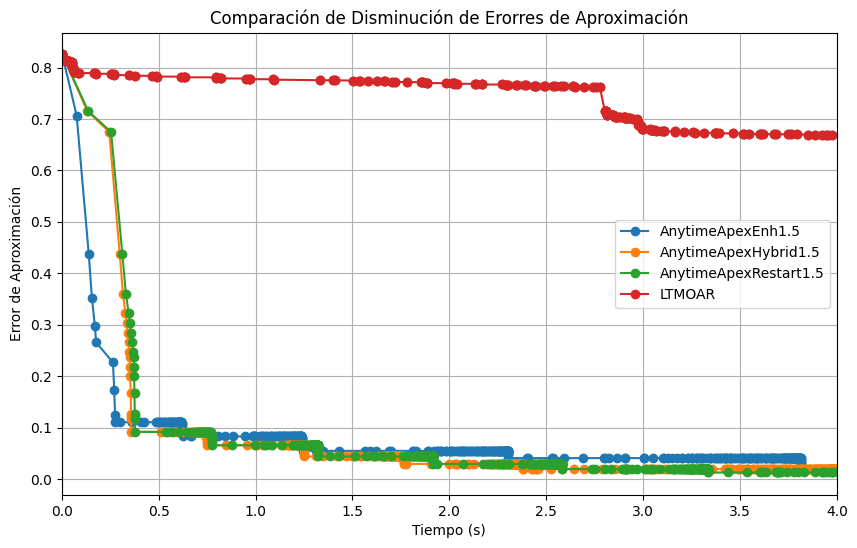

In [29]:
# AnytimeApexEnh1_,AnytimeApexHybrid1_5,AnytimeApexRestart1_5 graifcados en un solo plot
plt.figure(figsize=(10, 6))
plt.plot(AnytimeApexEnh1_5[0], AnytimeApexEnh1_5[1], marker='o', linestyle='-', label='AnytimeApexEnh1.5')
plt.plot(AnytimeApexHybrid1_5[0], AnytimeApexHybrid1_5[1], marker='o', linestyle='-', label='AnytimeApexHybrid1.5')
plt.plot(AnytimeApexRestart1_5[0], AnytimeApexRestart1_5[1], marker='o', linestyle='-', label='AnytimeApexRestart1.5')
plt.plot(LTMOA[0], LTMOA[1], marker='o', linestyle='-', label='LTMOAR')
plt.xlabel('Tiempo (s)')
plt.ylabel('Error de Aproximación')
plt.title('Comparación de Disminución de Erorres de Aproximación')
plt.grid(True)
plt.legend()
plt.xlim(0, 4)
#plt.ylim(0, 0.1)
plt.show()



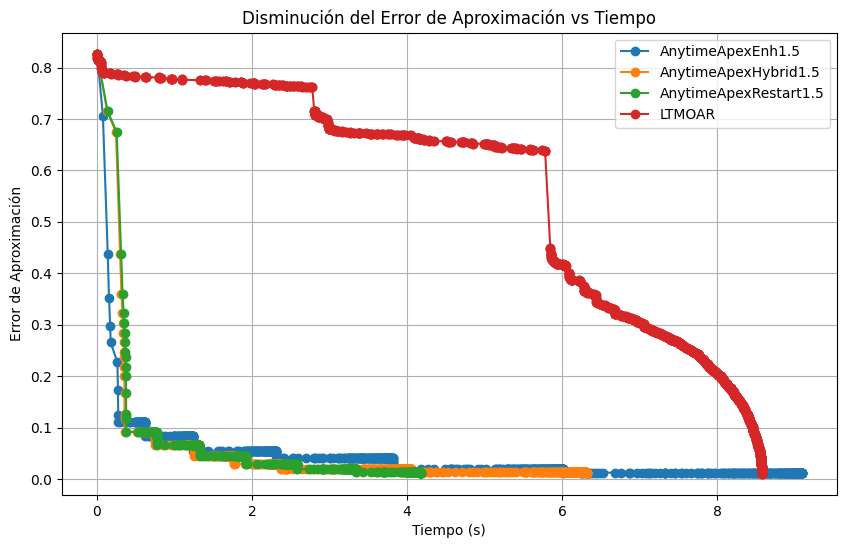

In [28]:
# AnytimeApexEnh1_,AnytimeApexHybrid1_5,AnytimeApexRestart1_5 graifcados en un solo plot
plt.figure(figsize=(10, 6))
plt.plot(AnytimeApexEnh1_5[0], AnytimeApexEnh1_5[1], marker='o', linestyle='-', label='AnytimeApexEnh1.5')
plt.plot(AnytimeApexHybrid1_5[0], AnytimeApexHybrid1_5[1], marker='o', linestyle='-', label='AnytimeApexHybrid1.5')
plt.plot(AnytimeApexRestart1_5[0], AnytimeApexRestart1_5[1], marker='o', linestyle='-', label='AnytimeApexRestart1.5')
plt.plot(LTMOA[0], LTMOA[1], marker='o', linestyle='-', label='LTMOAR')
plt.xlabel('Tiempo (s)')
plt.ylabel('Error de Aproximación')
plt.title('Disminución del Error de Aproximación vs Tiempo')
plt.grid(True)
plt.legend()
plt.show()

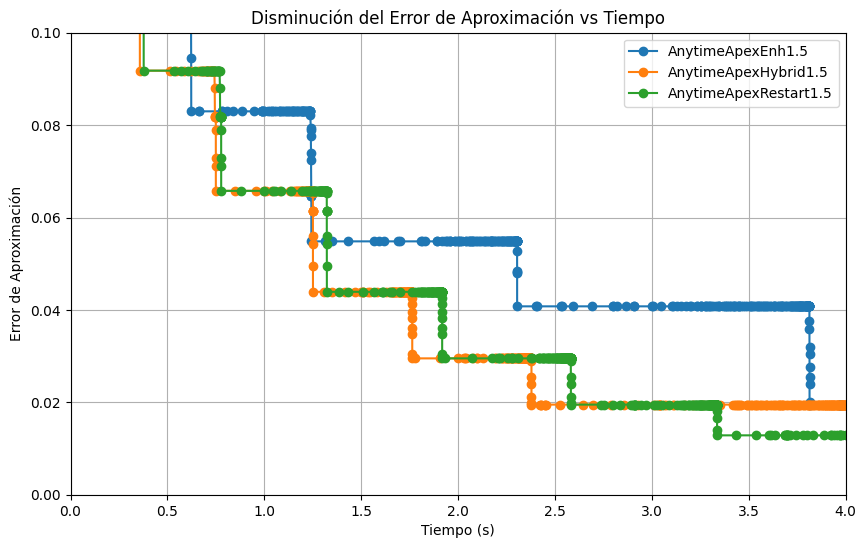

In [30]:
# AnytimeApexEnh1_,AnytimeApexHybrid1_5,AnytimeApexRestart1_5 graifcados en un solo plot
plt.figure(figsize=(10, 6))
plt.plot(AnytimeApexEnh1_5[0], AnytimeApexEnh1_5[1], marker='o', linestyle='-', label='AnytimeApexEnh1.5')
plt.plot(AnytimeApexHybrid1_5[0], AnytimeApexHybrid1_5[1], marker='o', linestyle='-', label='AnytimeApexHybrid1.5')
plt.plot(AnytimeApexRestart1_5[0], AnytimeApexRestart1_5[1], marker='o', linestyle='-', label='AnytimeApexRestart1.5')
#plt.plot(LTMOA[0], LTMOA[1], marker='o', linestyle='-', label='LTMOAR')
plt.xlabel('Tiempo (s)')
plt.ylabel('Error de Aproximación')
plt.title('Disminución del Error de Aproximación vs Tiempo')
plt.grid(True)
plt.legend()
plt.xlim(0, 4)
plt.ylim(0, 0.1)
plt.show()

In [32]:
ABOA = compute_approximation_error('BOASTART.txt', 'ABOA.txt')

In [46]:
BOASTAR = compute_approximation_error('BOASTART.txt', 'BOASTART.txt')

In [34]:
AnytimeApex = compute_approximation_error('BOASTART.txt', 'AnytimeApex.txt')

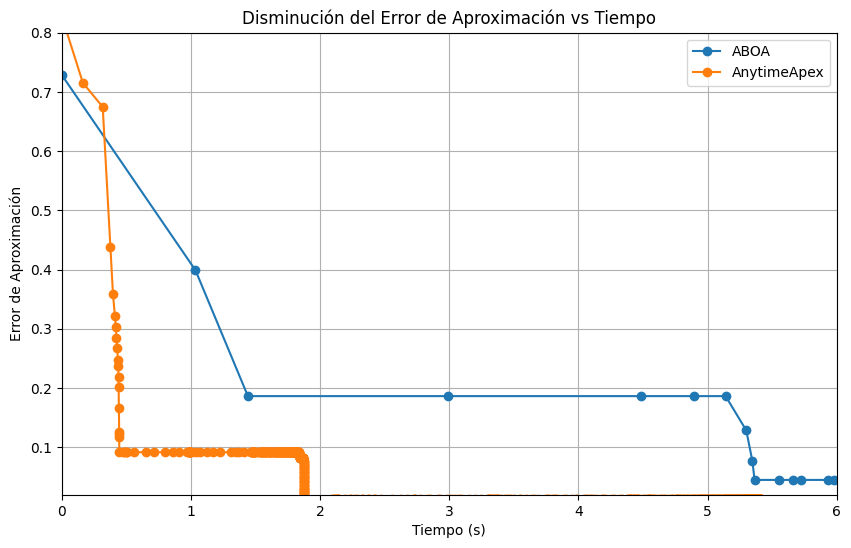

In [47]:
#graficar ABOA y AnytimeApex en un solo plot
plt.figure(figsize=(10, 6))
plt.plot(ABOA[0], ABOA[1], marker='o', linestyle='-', label='ABOA')
plt.plot(AnytimeApex[0], AnytimeApex[1], marker='o', linestyle='-', label='AnytimeApex')
plt.xlabel('Tiempo (s)')
plt.ylabel('Error de Aproximación')
plt.title('Disminución del Error de Aproximación vs Tiempo')
plt.grid(True)
plt.legend()
plt.xlim(0, 6)
plt.ylim(0.02, 0.8)
plt.show()


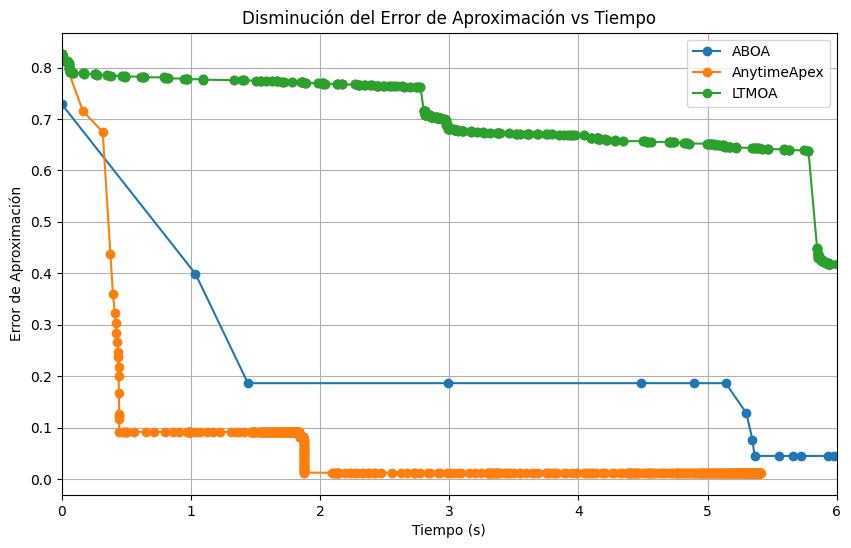

In [63]:
#graficar ABOA y AnytimeApex en un solo plot
plt.figure(figsize=(10, 6))
plt.plot(ABOA[0], ABOA[1], marker='o', linestyle='-', label='ABOA')
plt.plot(AnytimeApex[0], AnytimeApex[1], marker='o', linestyle='-', label='AnytimeApex')
plt.plot(LTMOA[0], LTMOA[1], marker='o', linestyle='-', label='LTMOA')
plt.xlabel('Tiempo (s)')
plt.ylabel('Error de Aproximación')
plt.title('Disminución del Error de Aproximación vs Tiempo')
plt.grid(True)
plt.legend()
plt.xlim(0, 6)
#plt.ylim(0.02, 0.8)
plt.show()


In [66]:
import csv

# Definir los nombres de las listas y sus valores
data = {
    'LTMOA': LTMOA,
    'AnytimeApexRestart1_5': AnytimeApexRestart1_5,
    'AnytimeApexHybrid1_5': AnytimeApexHybrid1_5,
    'AnytimeApexEnh1_5': AnytimeApexEnh1_5,
    'BOASTAR': BOASTAR,
    'ABOA': ABOA,
    'AnytimeApex': AnytimeApex
}

# Guardar los datos en un archivo CSV
with open('output.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    # Escribir los encabezados
    writer.writerow(['Name', 'Times', 'Errors'])
    # Escribir los datos
    for name, values in data.items():
        times, errors = values
        for t, e in zip(times, errors):
            writer.writerow([name, t, e])
